# Self Organizing Map

## Install MiniSom Package

The "minisom" package is a Python library that provides an implementation of the Self-Organizing Maps (SOM) algorithm, also known as Kohonen maps. SOMs are unsupervised machine learning models used for dimensionality reduction and visualization of high-dimensional data.

In [ ]:
!pip install MiniSom

### Importing the libraries


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [25]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [27]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


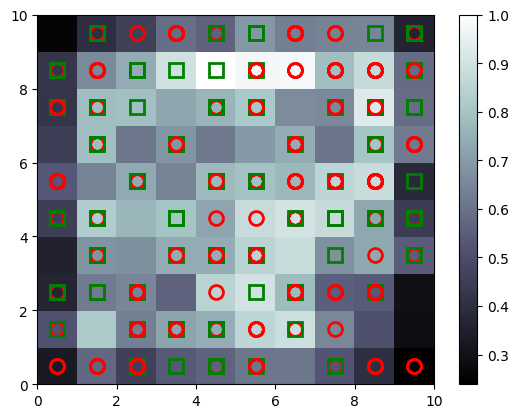

In [28]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [29]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,9)], mappings[(6,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15682860
15788776
15764226
15621423
15767231
15690492
15762716
15706464
15768474
15637891
15627190
15568878
15761047
15687527
15721569
15771409
15814116
15674750
15594651
15767729
15711446
15787693
15688210
15793366
15793317
15735106
15692430
15683276
15768777
15791326
15643574
15779586
15730150
